In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
global_data = pd.read_csv('data/global.csv')
global_data

,FID,thermo_tecto_age,thickness_upper_crust,thickness_middle_crust,upper_mantle_density_anomaly,d_2_ridge,d_2_trench,d_2_trans_ridge,d_2_volcano,d_2_hotspot,...,lat,GHF,upper_mantle_vel_structure,rock_type,age,magnetic_anomaly,depth_to_moho,lithos_asthenos_bdry,bougeur_gravity_anomaly,topography
0,0,1.0,12.999,13.000,0.0608,2048.46,2135.04,3879.25,1764.58,30.504098,...,75.500122,54.000000,2.0,3.0,2.297060,-1.698360,-42.095402,219571.00000,110.143997,76.226402
1,1,1.0,12.999,13.000,0.0608,2048.46,2135.04,3879.25,1764.58,30.504098,...,75.500122,57.500000,2.0,3.0,2.277860,-13.700700,-42.294998,237790.00000,114.978996,71.403198
2,2,1.0,13.000,13.000,0.0383,2056.02,2063.41,3853.50,1708.09,30.438463,...,74.500122,56.000000,2.0,3.0,2.282202,17.431999,-26.982100,245314.00000,119.232002,-151.248001
3,3,1.0,13.000,12.000,0.0343,1872.02,2567.14,4110.06,2071.42,34.677082,...,74.500122,118.167000,2.0,3.0,2.118015,-64.813202,-30.231199,183278.00000,123.305000,-74.843300
4,4,1.0,10.000,9.500,0.0059,2057.43,1913.82,3817.14,1585.16,25.700195,...,74.500122,46.530899,2.0,3.0,2.740498,10.648300,-31.743000,242293.00000,114.766998,139.421997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,4031,1.0,8.500,8.502,-0.0727,1484.39,4639.52,1754.06,226.68,5.522680,...,-46.500000,75.269200,3.0,3.0,1.897233,-74.271202,-36.190201,69162.79688,89.410698,857.000000
4030,4032,1.0,8.000,7.998,-0.0756,1469.81,4624.86,1753.49,216.77,4.527693,...,-46.500000,75.130800,3.0,1.0,1.869254,-25.160299,-32.507702,69681.39844,68.540298,985.000000
4031,4033,1.0,8.000,7.998,-0.0728,1455.81,4609.94,1753.66,210.30,3.535534,...,-46.500000,75.089500,6.0,1.0,1.847295,-44.879601,-29.178200,65409.19922,134.682007,294.000000
4032,4034,1.0,7.000,6.999,-0.0460,1417.52,4563.63,1758.55,210.04,0.707107,...,-46.500000,75.839000,6.0,1.0,1.751132,98.973999,-23.673401,56723.89844,145.632996,266.000000


In [3]:
X = global_data.drop(['GHF'],axis=1)
y = global_data['GHF']

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=11)



clf = LinearRegression()

clf.fit(X_train.drop(['lat','lon'],axis=1),y_train)
y_pred = clf.predict(X_test.drop(['lat','lon'],axis=1))



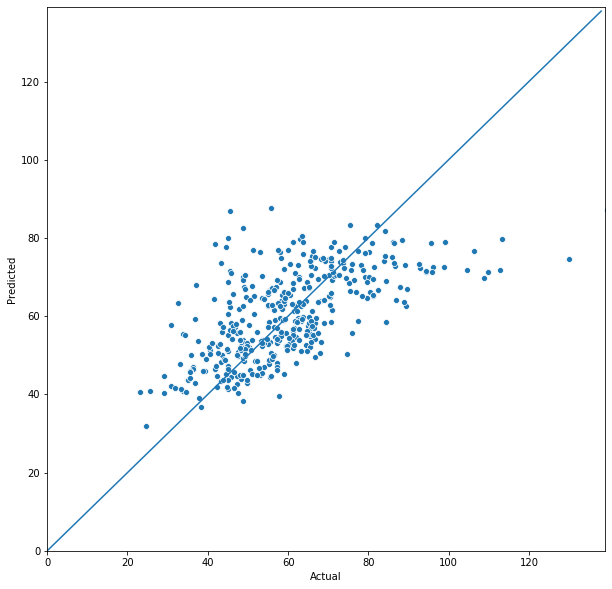

In [25]:
plotter  = pd.DataFrame()
plotter['Actual'] = y_test
plotter['Predicted'] = y_pred
plt.figure(figsize=(10, 10))
plt.xlim(0,max(int(max(y_test)),int(max(y_pred))))
plt.ylim(0,max(int(max(y_test)),int(max(y_pred))))
sns.scatterplot(x='Actual',y='Predicted',data=plotter)
sns.lineplot(x=range(0,max(int(max(y_test)),int(max(y_pred)))),y = range(0,max(int(max(y_test)),int(max(y_pred)))))
